In [2]:
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import sys
sys.path.append("../../../src/")

import nanonets

In [3]:
amplitude       = 0.1
step_size       = 1e-10
steps_in_sweep  = 100
n_sweeps        = 1
signal          = [np.linspace(-1*amplitude, amplitude, steps_in_sweep//2, endpoint=False) if (i % 2 == 0) else np.linspace(amplitude, -1*amplitude, steps_in_sweep//2, endpoint=False) for i in range(n_sweeps)]
signal          = [x for xs in signal for x in xs]
voltages        = np.zeros(shape=(n_sweeps*steps_in_sweep//2,9))
voltages[:,0]   = signal
time            = step_size*np.arange(n_sweeps*steps_in_sweep//2)

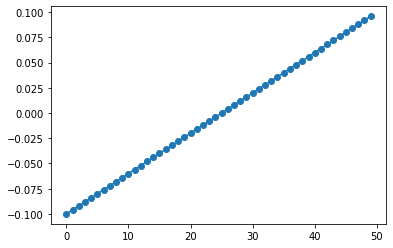

In [4]:
plt.plot(voltages[:,0],'o-')

In [14]:
data = {}

for N in [3,5,7,9]:
    results = {}

    for target_electrode in [1,2,6,7]:

        sim_info    = {
            "error_th"          : 0.05,      
            "max_jumps"         : 10000000,
            "eq_steps"          : 10000,
            "jumps_per_batch"   : 1000,
            "kmc_counting"      : False,
            "min_batches"       : 10
        }

        topology = {
            "Nx"    : N,
            "Ny"    : N,
            "Nz"    : 1,
            "e_pos" :  [[0,0,0],[int((N-1)/2),0,0],[N-1,0,0],[0,int((N-1)/2),0],[0,N-1,0],[int((N-1)/2),N-1,0],[N-1,int((N-1)/2),0],[N-1,N-1,0]]
        }

        sim_class = nanonets.simulation(network_topology='cubic', topology_parameter=topology)
        sim_class.run_const_voltages(voltages=voltages, target_electrode=target_electrode, output_potential=True, sim_dic=sim_info, save_th=0.1)
        results[target_electrode] = sim_class.return_output_values()
    data[N] = results

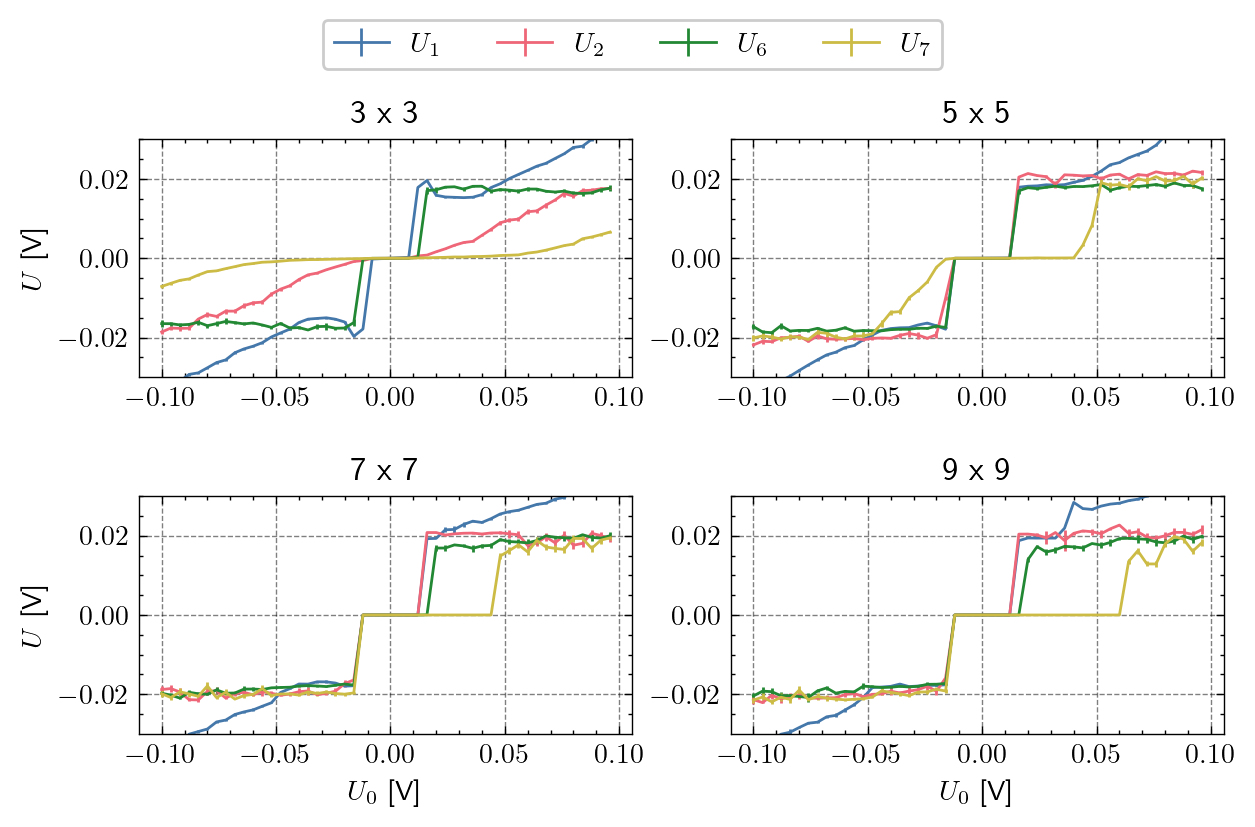

In [28]:
with plt.style.context(["science","bright","grid"]):

    fig = plt.figure(dpi=200)
    fig.set_figwidth(fig.get_figwidth()*2)
    fig.set_figheight(fig.get_figheight()*1.5)

    for i, N in enumerate([3,5,7,9]):

        ax  = fig.add_subplot(2,2,i+1)

        for key,result in data[N].items():

            ax.errorbar(voltages[:,0], result[:,2], result[:,3], label=f'$U_{key}$')
        
        if i == 0:
            ax.legend(ncol=4, bbox_to_anchor=(1,1.4), loc='center')

        if i >= 2:

            ax.set_xlabel("$U_0$ [V]")

        if i % 2 == 0:
            ax.set_ylabel("$U$ [V]")

        ax.set_ylim(-0.03,0.03)
        ax.set_title(f"{N} x {N}")
    
    fig.subplots_adjust(hspace=0.5)
    fig.savefig('test.pdf')

In [7]:
data

{3: {1: array([[ 1.00000000e+04,  1.00000000e+04, -3.38240176e-02,
           5.39479545e-04],
         [ 1.00000000e+04,  1.00000000e+04, -3.23238570e-02,
           3.71974892e-04],
         [ 1.00000000e+04,  1.00000000e+04, -3.11045281e-02,
           4.27353174e-04],
         [ 1.00000000e+04,  1.00000000e+04, -3.03670947e-02,
           2.72657086e-04],
         [ 1.00000000e+04,  1.00000000e+04, -2.85865109e-02,
           2.63929135e-04],
         [ 1.00000000e+04,  1.00000000e+04, -2.78370720e-02,
           3.48617453e-04],
         [ 1.00000000e+04,  1.00000000e+04, -2.67469985e-02,
           2.24971068e-04],
         [ 1.00000000e+04,  1.00000000e+04, -2.54370425e-02,
           1.50307811e-04],
         [ 1.00000000e+04,  1.00000000e+04, -2.39016513e-02,
           2.72011301e-04],
         [ 1.00000000e+04,  1.00000000e+04, -2.30480169e-02,
           1.74542454e-04],
         [ 1.00000000e+04,  1.00000000e+04, -2.16913437e-02,
           2.31344330e-04],
         [ 1.00